# Visual Time Series Decomposition


In [11]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df = pd.read_csv('./Data/imputedWQ.csv', parse_dates=True, header=0, index_col=0)

In [13]:
# create Series object
Tp = df['Tp']
Cl = df['Cl']
pH = df['pH']
Redox = df['Redox']
Leit = df['Leit']
Cl2 = df['Cl_2']
Fm = df['Fm']
Fm_2 = df['Fm_2']


    Trend – overall direction of the series i.e. upwards, downwards etc
    Seasonality – monthly or yearly patterns
    Cycle – long-term business cycles, they usually come after 5 or 7 years
    Noise – irregular remainder left after extraction of all the components


Why bother decomposing the original / actual time series into components? It is much easier to forecast the individual regular patterns produced through decomposition of time series than the actual series. Since stationarity is a vital assumption we need to verify if our time series follows a stationary process or not. We can do so by:

Plotting: review the time series plot of our data and visually check if there are any obvious trends or seasonality

Statistical tests: use statistical tests to check if the expectations of stationarity are met or have been violate

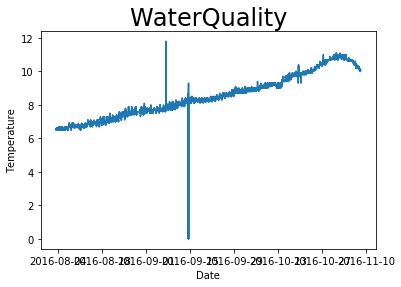

In [18]:
# simple line plot
plt.plot(Tp) 
plt.title('WaterQuality', fontsize=24)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

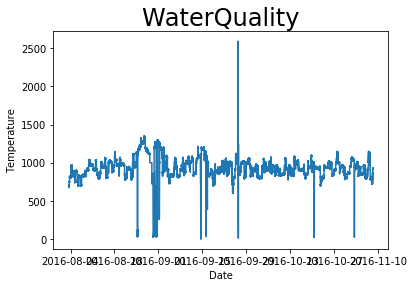

In [25]:
# simple line plot
plt.plot(Fm_2) 
plt.title('WaterQuality', fontsize=24)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

From this preliminary plots we can see that there is some kind of increasing trend in the series along with seasonal variation.

## The Trend

One way to identify a trend pattern is to use moving averages over a specific window of past observations. This smooths the curve by averaging adjacent values over the specified time horizon (rolling window). We can implement such rolling windows in Python by

In [7]:
y=Tp

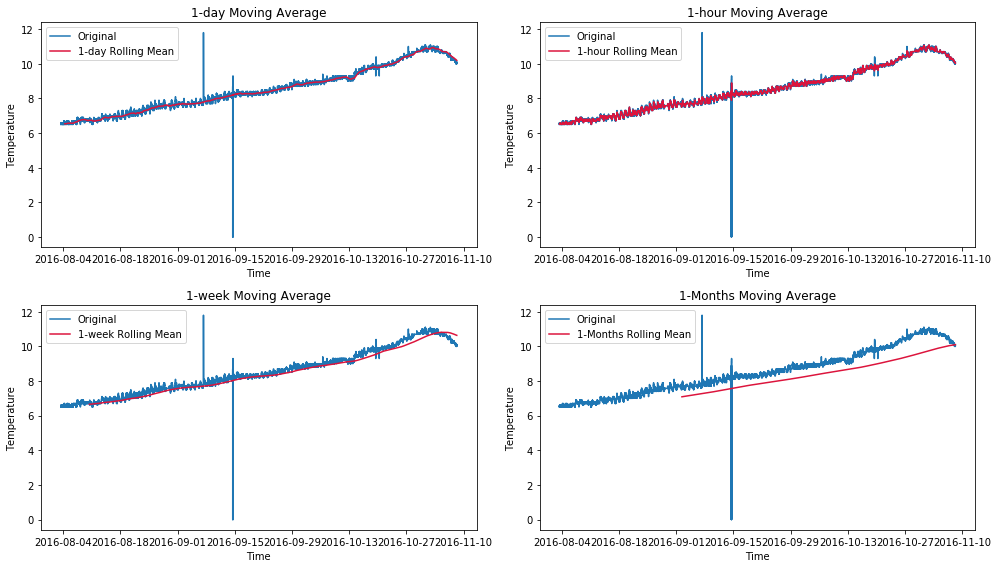

In [8]:
# define figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);
 
# push data to each ax
#upper left
axes[0][0].plot(y.index, y, label='Original');
axes[0][0].plot(y.index, y.rolling(window=1440).mean(), label='1-day Rolling Mean', color='crimson');
axes[0][0].set_xlabel("Time");
axes[0][0].set_ylabel("Temperature");
axes[0][0].set_title("1-day Moving Average");
axes[0][0].legend(loc='best');
 
# upper right
axes[0][1].plot(y.index, y, label='Original')
axes[0][1].plot(y.index, y.rolling(window=60).mean(), label='1-hour Rolling Mean', color='crimson');
axes[0][1].set_xlabel("Time");
axes[0][1].set_ylabel("Temperature");
axes[0][1].set_title("1-hour Moving Average");
axes[0][1].legend(loc='best');
 
# lower left
axes[1][0].plot(y.index, y, label='Original');
axes[1][0].plot(y.index, y.rolling(window=10080).mean(), label='1-week Rolling Mean', color='crimson');
axes[1][0].set_xlabel("Time");
axes[1][0].set_ylabel("Temperature");
axes[1][0].set_title("1-week Moving Average");
axes[1][0].legend(loc='best');
 
# lower right
axes[1][1].plot(y.index, y, label='Original');
axes[1][1].plot(y.index, y.rolling(window=43200).mean(), label='1-Months Rolling Mean', color='crimson');
axes[1][1].set_xlabel("Time");
axes[1][1].set_ylabel("Temperature");
axes[1][1].set_title("1-Months Moving Average");
axes[1][1].legend(loc='best');
plt.tight_layout();
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10080,center=False).mean()
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10080,center=False).std()
  import sys


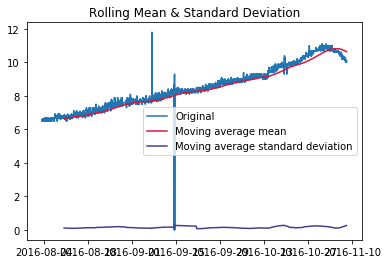

In [9]:
def plot_rolling_average(y, window=10080):
    '''
    Plot rolling mean and rolling standard deviation for a given time series and window
    '''
    # calculate moving averages
    rolling_mean = pd.rolling_mean(y, window=window)
    rolling_std = pd.rolling_std(y, window=window)
 
    # plot statistics
    plt.plot(y, label='Original')
    plt.plot(rolling_mean, color='crimson', label='Moving average mean')
    plt.plot(rolling_std, color='darkslateblue', label='Moving average standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    return
 
# use the function
plot_rolling_average(y)

# Seasonality

Tempertature series- seasonality

In [27]:
# create new columns to DataFrame by extracting a string representing 
# the time under the control of an explicit format string
# '%b' extracts the month in locale's abbreviated name from the index
df = pd.read_csv('./Data/imputedWQ.csv', header=0, index_col=0, parse_dates=True, sep=';')
df['Day'] = df.index.strftime('%d/%m/%Y')
df['Month'] = df.index.strftime('%b')
 
# create nice axes names
#month_names = pd.date_range(start='1949-01-01', periods=12, freq='MS').strftime('%b')
 
# reshape data using 'Year' as index and 'Month' as column
#df_piv_line = df.pivot(index='Month', columns='Year', values='n_passengers')
#df_piv_line = df_piv_line.reindex(index=month_names)
 
# create line plot
df_piv_line.plot(colormap='jet')
plt.title('Seasonal Effect per Day', fontsize=24)
plt.ylabel('Temperature')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.show()

AttributeError: 'Index' object has no attribute 'strftime'

In [29]:
# multiplicative seasonal decomposition
decomp = seasonal_decompose(Tp, model='additive')
decomp.plot();
plt.show()

ValueError: freq T not understood. Please report if you think this is in error.